In [167]:
import pandas as pd
import requests
import zipfile
import io
import os
import csv
import ctypes as ct
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re


In [168]:
source_file = "https://escoe-website.s3.amazonaws.com/wp-content/uploads/2018/10/08164544/BGSCSV.zip"
r = requests.get(source_file)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("downloads/")
os.listdir("downloads/")



['BGSIndices.csv', 'BGSAmounts.csv', 'BGSDetails.csv', 'BGSPrices.csv']

In [169]:
from bgs.load_bgs_amounts import load_bgs_amounts

In [170]:
tables = load_bgs_amounts("downloads/BGSAmounts.csv")

In [171]:
tables.keys()

dict_keys(['Conventionals', 'Sum of Conventionals', 'Index-linked Old-style', 'Index-linked New-style', 'Calculated indexed nominal Old-style', 'Calculated indexed nominal New-style', 'Sum of total conventional and indexed-linked'])

In [172]:
conv = tables['Conventionals']

In [173]:
conv.shape

(734, 430)

In [174]:
conv.head()

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
Mar 1964,505,274,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
Apr 1964,505,274,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
May 1964,Redeemed,Redeemed,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
Jun 1964,,,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482
Jul 1964,,,391,709,978,,749,400,500,533,...,,,374,1909,510,58,2,21,276,482


In [175]:
conv.replace("Redeemed", "", inplace=True)
conv = conv.apply(pd.to_numeric, errors='coerce')
conv.fillna(0, inplace=True)


In [176]:
conv.head()

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
Mar 1964,505.0,274.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
Apr 1964,505.0,274.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
May 1964,0.0,0.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
Jun 1964,0.0,0.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0
Jul 1964,0.0,0.0,391.0,709.0,978.0,0.0,749.0,400.0,500.0,533.0,...,0.0,0.0,374.0,1909.0,510.0,58.0,2.0,21.0,276.0,482.0


In [177]:
conv.sum(axis=1).head()

Mar 1964    19070.0
Apr 1964    19070.0
May 1964    18691.0
Jun 1964    18691.0
Jul 1964    18691.0
dtype: float64

In [178]:
sum_conv = tables["Sum of Conventionals"]
sum_conv.head()

,index,Sum of Conventionals
0,Mar 1964,"19,070.000"
1,Apr 1964,"19,070.000"
2,May 1964,"18,691.000"
3,Jun 1964,"18,691.000"
4,Jul 1964,"18,691.000"


In [179]:
from bgs.load_bgs_prices import load_prices
price_df=load_prices("downloads/BGSPrices.csv")

INFO:bgs.load_bgs_prices:['28 Nov 1975', '31 Dec 1975', '30 Jan 1976', '27 Feb 1976', '31 Mar 1976', '30 Apr 1976', '28 May 1976', '30 Jun 1976', '30 Jul 1976', '31 Aug 1976', '30 Sep 1976', '29 Oct 1976', '30 Nov 1976', '31 Dec 1976', '31 Jan 1977', '28 Feb 1977', '31 Mar 1977', '29 Apr 1977', '31 May 1977', '30 Jun 1977', '29 Jul 1977', '31 Aug 1977', '30 Sep 1977', '31 Oct 1977', '30 Nov 1977', '30 Dec 1977', '31 Jan 1978', '28 Feb 1978', '31 Mar 1978', '28 Apr 1978', '31 May 1978', '30 Jun 1978', '31 Jul 1978', '31 Aug 1978', '29 Sep 1978', '31 Oct 1978', '30 Nov 1978', '29 Dec 1978', '31 Jan 1979', '28 Feb 1979', '30 Mar 1979', '30 Apr 1979', '31 May 1979', '29 Jun 1979', '31 Jul 1979', '31 Aug 1979', '28 Sep 1979', '31 Oct 1979', '30 Nov 1979', '31 Dec 1979', '31 Jan 1980', '29 Feb 1980', '31 Mar 1980', '30 Apr 1980', '30 May 1980', '30 Jun 1980', '31 Jul 1980', '29 Aug 1980', '30 Sep 1980', '31 Oct 1980', '28 Nov 1980', '31 Dec 1980', '30 Jan 1981', '27 Feb 1981', '31 Mar 1981',

In [180]:
price_df.head()

,100,200,300,400,500,600,700,800,900,1000,...,77000,77100,77200,77300,77400,77500,77600,77700,77800,77900
28 Nov 1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31 Dec 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30 Jan 1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27 Feb 1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31 Mar 1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
price_df.tail(20)

,100,200,300,400,500,600,700,800,900,1000,...,77000,77100,77200,77300,77400,77500,77600,77700,77800,77900
29 Sep 2023,0,0,0,0,0,0,0,0,0,0,...,25.244692,24.690908,24.154637,23.635198,23.131944,22.64426,22.171562,21.713299,21.268945,21.268945
31 Oct 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.647448,24.098242,23.56622,23.050711,22.551081,22.066727,21.597084,21.141614,20.69981,20.69981
30 Nov 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.884572,26.324784,25.782317,25.256516,24.74676,24.252465,23.773075,23.308066,22.856938,22.856938
29 Dec 2023,0,0,0,0,0,0,0,0,0,0,...,31.189534,30.608365,30.042641,29.491791,28.955302,28.432708,27.923591,27.427573,26.944312,26.944312
31 Jan 2024,0,0,0,0,0,0,0,0,0,0,...,28.378672,27.78428,27.207651,26.648185,26.10532,25.578527,25.067306,24.571177,24.089683,24.089683
29 Feb 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.069882,27.477846,26.903438,26.346078,25.80522,25.280346,24.770964,24.276599,23.796796,23.796796
28 Mar 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.19021,28.585522,27.997813,27.426546,26.871231,26.331413,25.806668,25.2966,24.800829,24.800829
30 Apr 2024,0,0,0,0,0,0,0,0,0,0,...,26.478775,25.889213,25.318019,24.764595,24.228376,23.708818,23.205402,22.717623,22.244995,22.244995
31 May 2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.928706,26.328084,25.745998,25.181868,24.635142,24.105291,23.591805,23.094189,22.611962,22.611962
28 Jun 2024,0,0,0,0,0,0,0,0,0,0,...,27.611761,27.006116,26.418968,25.849718,25.297805,24.762694,24.243875,23.740857,23.253169,23.253169


In [182]:
price_df.index[0]

'28 Nov 1975'

In [183]:
c = pd.Series(pd.to_datetime(price_df.index, format="%d %b %Y")).dt.strftime("%b %Y").values
c[:10]

array(['Nov 1975', 'Dec 1975', 'Jan 1976', 'Feb 1976', 'Mar 1976',
       'Apr 1976', 'May 1976', 'Jun 1976', 'Jul 1976', 'Aug 1976'],
      dtype=object)

In [184]:
c[0]

'Nov 1975'

In [185]:
conv[conv.index==c[0]]

,100,200,300,400,500,600,700,800,900,1000,...,32295,32297,32300,32400,32500,32600,32700,32800,32900,33000
Nov 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,365.0,1909.0,292.0,58.0,2.0,21.0,276.0,482.0


In [186]:
price_df[32300]

28 Nov 1975    27.6875
31 Dec 1975     26.375
30 Jan 1976       29.5
27 Feb 1976    28.9375
31 Mar 1976      28.75
                ...   
31 Dec 2024          0
31 Jan 2025          0
28 Feb 2025        0.0
31 Mar 2025        0.0
30 Apr 2025        0.0
Name: 32300, Length: 594, dtype: object

In [187]:
price_df.index = pd.to_datetime(price_df.index, format="%d %b %Y").strftime("%b %Y")

In [188]:
price_df.columns = price_df.columns.map(str)
price_df['3500']

Nov 1975    98.78125
Dec 1975       99.29
Jan 1976       99.75
Feb 1976     missing
Mar 1976    Redeemed
              ...   
Dec 2024           0
Jan 2025           0
Feb 2025         0.0
Mar 2025         0.0
Apr 2025         0.0
Name: 3500, Length: 594, dtype: object

In [189]:
price_strings = np.where(price_df.map(lambda x: type(x)==str))
price_strings

(array([  0,   0,   3, ..., 586, 589, 590], shape=(2111,)),
 array([ 50,  59,  34, ..., 617, 618, 354], shape=(2111,)))

In [190]:
c = Counter()
for i, x in enumerate(price_strings[0]):
    c[price_df.loc[price_df.index[x],price_df.columns[price_strings[1][i]]]]+=1
c.most_common(10)

[('missing', 1654), ('Redeemed', 383), ('Amalgamated', 72), ('redeemed', 2)]

In [191]:
c.keys()

dict_keys(['missing', 'Amalgamated', 'Redeemed', 'redeemed'])

In [192]:
for text in ['Amalgamated', 'Redeemed', 'redeemed']:
    price_df = price_df.replace(text, None)
price_df = price_df.fillna(0)
price_df = price_df.replace('missing', None)
price_df = price_df.ffill(axis=0)

/tmp/ipykernel_23096/1913237909.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_df = price_df.fillna(0)
/tmp/ipykernel_23096/1913237909.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_df = price_df.ffill(axis=0)


In [193]:
conv.columns

Index(['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000',
       ...
       '32295', '32297', '32300', '32400', '32500', '32600', '32700', '32800',
       '32900', '33000'],
      dtype='object', length=430)

In [194]:
not_in_conventionals = set(price_df.columns.astype(str)) - set(conv.columns)

In [195]:
from bgs.load_gilt_details import load_csv_blocks
details = load_csv_blocks("downloads/BGSDetails.csv")

In [196]:
details['Conventionals'].head()

,Inst Code,Sedol,ISIN Code,%,Stock,Suffix,Special features,First year,Last year,Issue date,...,Col for I-L,Number of calls,Call payment 1,due on,Call payment 2,due on,Call payment 3,due on,Call payment 4,due on
100,4HCV64,,,4.5,Conversion,,,,1964,15 Jan 1959,...,,,,,,,,,,
200,2HEX6364,,,2.5,Exchequer,,,1963,1964,14 Nov 1954,...,,,,,,,,,,
300,4TY65,,,4,Treasury,,,,1965,4 Oct 1962,...,,,,,,,,,,
400,3SB5565,,,3,Savings bonds,,,1955,1965,2 Jan 1941,...,,,,,,,,,,
500,5HEX66,,,5.5,Exchequer,,,,1966,14 Jan 1958,...,,,,,,,,,,


In [197]:
details['Conventionals']['Suffix'].unique()

array(['', 'A', 'B', 'C', 'D', 'E'], dtype=object)

In [198]:
details['Conventionals']['due on'].isna().sum(axis = 0)

due on    0
due on    0
due on    0
due on    0
dtype: int64

In [199]:
details['Conventionals']['Earliest redemption date']

100                 
200      14 May 1963
300                 
400      15 Aug 1955
500                 
            ...     
32295               
32297               
32300     1 Feb 1957
32400     1 Dec 1952
32500     1 Apr 1961
Name: Earliest redemption date, Length: 425, dtype: object

In [200]:
details['Conventionals']['Latest redemption date']

100      14 May 1964
200      14 May 1964
300       1 Feb 1965
400      15 Aug 1965
500      15 Mar 1966
            ...     
32295    22 Oct 2071
32297    22 Oct 2073
32300               
32400               
32500               
Name: Latest redemption date, Length: 425, dtype: object

In [201]:
details['Index-Linked Old-style'].index

Index(['50000', '50100', '50200', '50300', '50400', '50500', '50600', '50700',
       '50800', '50900', '51000', '51100', '51200', '51300', '51400', '51500',
       '51600', '51700', '51800', '51900'],
      dtype='object')

In [202]:
(set(details['Index-Linked Old-style'].index) | set(details['Index-Linked New-style'].index)) - not_in_conventionals

set()

In [203]:
def partial_convert(bgs_index):
    if re.match(r'^\d{2}\s\w{3}\s+\d{4}$', bgs_index):
        return pd.to_datetime(bgs_index, format="%d %b %Y", errors='coerce').strftime("%b %Y")
    else:
        return bgs_index

conv.index = pd.Index([partial_convert(x) for x in list(conv.index)])

In [204]:
re.match(r'^\d{2}\s\w{3}\s+\d{4}$','30 Apr 2024')

<re.Match object; span=(0, 11), match='30 Apr 2024'>

In [205]:
mtm_list = []

for bgs_gilt_id in conv.columns:
    print(bgs_gilt_id)
    # print(bgs_gilt_id)
    calc_df = pd.DataFrame(index=price_df.index, columns=['amounts','prices'])
    calc_df = pd.concat([conv[bgs_gilt_id],price_df[bgs_gilt_id]], join='inner', axis=1, keys=['amounts','prices'])
    calc_df['mtm'] = calc_df['amounts']*calc_df['prices']/100
    mtm_list.append(calc_df['mtm'].rename(bgs_gilt_id).copy())
#mtm_df[bgs_gilt_id] = calc_df['amounts']*calc_df['prices']
#mtm_list.append(mtm_df)
conv_mtm_df = pd.concat(mtm_list, axis=1)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [206]:
conv_mtm_df.index

Index(['Nov 1975', 'Dec 1975', 'Jan 1976', 'Feb 1976', 'Mar 1976', 'Apr 1976',
       'May 1976', 'Jun 1976', 'Jul 1976', 'Aug 1976',
       ...
       'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024',
       'Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025'],
      dtype='object', length=594)

In [207]:
conv_mtm_df.sum(axis=1)

Nov 1975    2.328926e+04
Dec 1975    2.509547e+04
Jan 1976    2.762346e+04
Feb 1976    2.822836e+04
Mar 1976    2.736702e+04
                ...     
Dec 2024    1.663885e+06
Jan 2025    1.664482e+06
Feb 2025    1.701624e+06
Mar 2025    1.664187e+06
Apr 2025    1.726765e+06
Length: 594, dtype: float64

In [208]:
conv.index

Index(['Mar 1964', 'Apr 1964', 'May 1964', 'Jun 1964', 'Jul 1964', 'Aug 1964',
       'Sep 1964', 'Oct 1964', 'Nov 1964', 'Dec 1964',
       ...
       'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024',
       'Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025'],
      dtype='object', length=734)

In [209]:
conv.loc['Dec 2024']

100      0.0
200      0.0
300      0.0
400      0.0
500      0.0
        ... 
32600    0.0
32700    0.0
32800    0.0
32900    0.0
33000    0.0
Name: Dec 2024, Length: 430, dtype: float64

<Axes: >

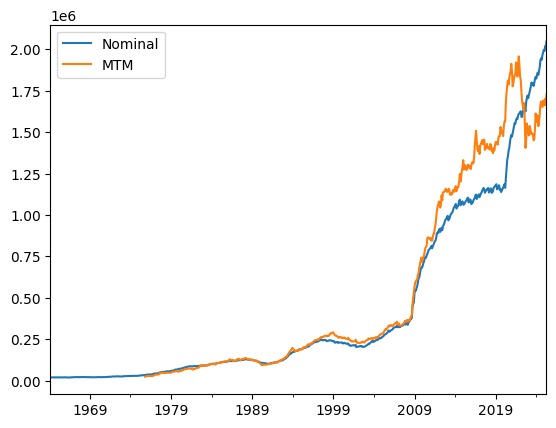

In [210]:
conventionals = pd.DataFrame()
conventionals['Nominal'] = conv.sum(axis=1)
conventionals['MTM'] = conv_mtm_df.sum(axis=1)
conventionals.index = pd.to_datetime(conventionals.index, format="%b %Y")
conventionals.plot()
# fig = plt.figure(figsize=(12, 6))
# ax = fig.add_subplot(111)
# ax.set_title("BGS MTM")
# ax.set_xlabel("Date")
# ax.set_ylabel("MTM")
# conv.sum(axis=1).plot(ax=ax, label='Conv')
# mtm_df.sum(axis=1).plot(ax=ax, label='MTM')
# ax.legend()

<Axes: >

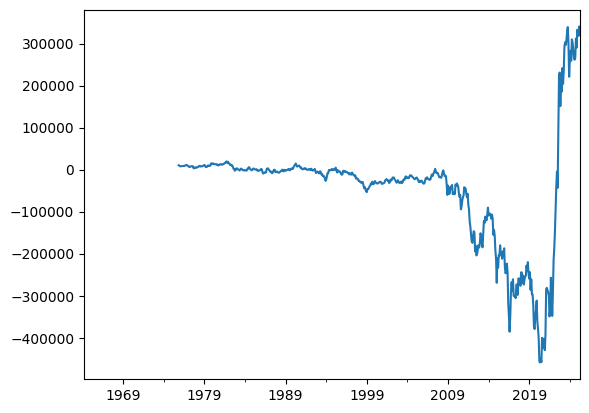

In [211]:
(conventionals['Nominal'] - conventionals['MTM']).plot()

<Axes: >

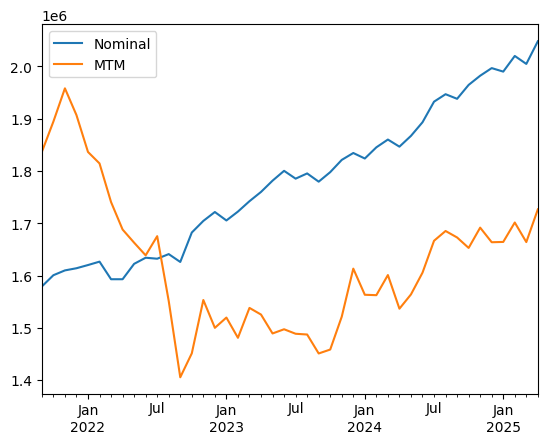

In [212]:
conventionals['2021-09-01':].plot()

In [213]:
old = tables['Calculated indexed nominal Old-style']

old.replace("Redeemed", "", inplace=True)
old = old.apply(pd.to_numeric, errors='coerce')
old.fillna(0, inplace=True)

In [214]:
def partial_convert(bgs_index):
    if re.match(r'^\d{2}\s\w{3}\s+\d{4}$', bgs_index):
        return pd.to_datetime(bgs_index, format="%d %b %Y", errors='coerce').strftime("%b %Y")
    else:
        return bgs_index

old.index = pd.Index([partial_convert(x) for x in list(old.index)])

In [215]:
for bgs_gilt_id in old.columns:
    # print(bgs_gilt_id)
    calc_df = pd.DataFrame(index=price_df.index, columns=['amounts','prices'])
    calc_df = pd.concat([old[bgs_gilt_id],price_df[bgs_gilt_id]], join='inner', axis=1, keys=['amounts','prices'])
    calc_df['mtm'] = calc_df['amounts']*calc_df['prices']/100
    mtm_list.append(calc_df['mtm'].rename(bgs_gilt_id).copy())

In [216]:
new = tables['Calculated indexed nominal New-style']

new.replace("Redeemed", "", inplace=True)
new = new.apply(pd.to_numeric, errors='coerce')
new.fillna(0, inplace=True)

for bgs_gilt_id in new.columns:
    # print(bgs_gilt_id)
    calc_df = pd.DataFrame(index=price_df.index, columns=['amounts','prices'])
    calc_df = pd.concat([new[bgs_gilt_id],price_df[bgs_gilt_id]], join='inner', axis=1, keys=['amounts','prices'])
    calc_df['mtm'] = calc_df['amounts']*calc_df['prices']/100
    mtm_list.append(calc_df['mtm'].rename(bgs_gilt_id).copy())

In [ ]:
total_gilts_mtm = pd.concat(mtm_list, axis=1)

total_gilts = pd.DataFrame()
total_gilts['MTM'] = total_gilts_mtm.sum(axis=1)
total_gilts.index = pd.to_datetime(total_gilts.index, format="%b %Y")


<Axes: xlabel='index'>

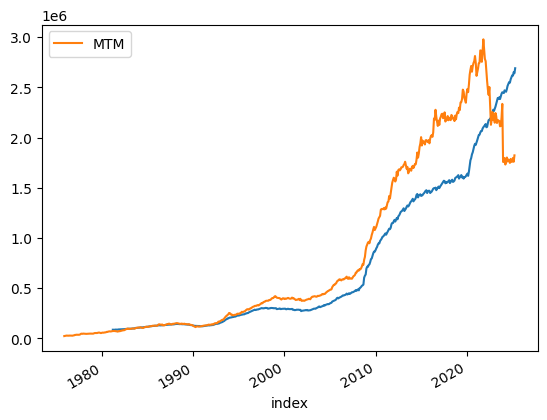

In [225]:
total_nominal = tables['Sum of total conventional and indexed-linked']
total_nominal=total_nominal.reset_index()

def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%d %B %Y")
    except ValueError:
        return  pd.to_datetime(date_str, format="%m %Y")
# pd.to_datetime(total_nominal['index'], format="%d %B %Y")
total_nominal['index'] = pd.to_datetime(total_nominal['index'], format='mixed')
total_nominal = total_nominal.dropna().set_index('index')
total_nominal['Sum of total conventional and indexed-linked'] = pd.to_numeric(total_nominal['Sum of total conventional and indexed-linked'])
ax = total_nominal['Sum of total conventional and indexed-linked'].plot()
total_gilts.plot(ax = ax)

In [230]:
total_nominal['Sum of total conventional and indexed-linked']

index
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
1964-06-01          NaN
1964-07-01          NaN
                ...    
2024-12-31    2620691.0
2025-01-31    2617256.0
2025-02-28    2651899.0
2025-03-31    2641129.0
2025-04-30    2691295.0
Name: Sum of total conventional and indexed-linked, Length: 734, dtype: float64

In [231]:
total_gilts

,MTM
1975-11-01,2.328926e+04
1975-12-01,2.509547e+04
1976-01-01,2.762346e+04
1976-02-01,2.822836e+04
1976-03-01,2.736702e+04
...,...
2024-12-01,1.758829e+06
2025-01-01,1.761091e+06
2025-02-01,1.797851e+06
2025-03-01,1.759671e+06


In [232]:
total_nominal['Sum of total conventional and indexed-linked'] - total_gilts['MTM']

1964-03-01   NaN
1964-04-01   NaN
1964-05-01   NaN
1964-06-01   NaN
1964-07-01   NaN
              ..
2025-02-28   NaN
2025-03-01   NaN
2025-03-31   NaN
2025-04-01   NaN
2025-04-30   NaN
Length: 750, dtype: float64